In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
toss=np.array(["s","c","c","c","c"])

In [14]:
def P(H):
    return 1

In [9]:
#def P(event,data):
 #   p=np.count_nonzero(toss == event)/np.size(toss)
  #  return p

In [109]:
H=np.arange(0,1.1,0.1)
print(H)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [35]:
def P_obs_H(nc,ns,H):
    P=H**nc*(1-H)**ns
    return P

In [36]:
P_obs_H(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H)

array([0.000e+00, 6.561e-02, 8.192e-02, 7.203e-02, 5.184e-02, 3.125e-02,
       1.536e-02, 5.670e-03, 1.280e-03, 9.000e-05, 0.000e+00])

In [37]:
def P_H_obs(nc,ns,H,toss):
    p=P_obs_H(nc,ns,H)*P(H)/np.size(toss)
    return p

In [38]:
y=P_H_obs(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H,toss)

Text(0, 0.5, 'P(H|obs)')

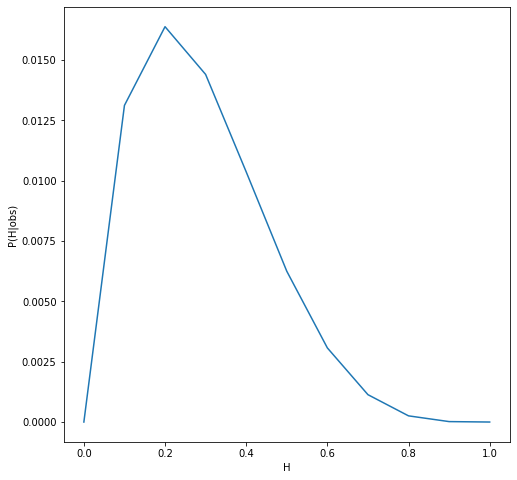

In [39]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.xlabel("H")
plt.ylabel('P(H|obs)')

In [74]:
def x_max(y,H):
    for i in range(len(y)-2):
        if np.diff(y)[i]*np.diff(y)[i+1]<0 :
            return (H[i]+H[i+1])/2, i

In [77]:
x_bar=x_max(y, H)[0]
pos=x_max(y, H)[1]
print(x_bar)

0.15000000000000002


In [78]:
def sigma(y,x_bar,pos):
    return -np.diff(np.diff(y))[pos]

In [97]:
sig=sigma(y,x_bar,pos)
print(sigma(y,x_bar,pos))
valor=[x_bar,"+/-",sig]

0.005240000000000007


In [101]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Text(0.5, 0.98, "[0.15000000000000002, '+/-', 0.005240000000000007]")

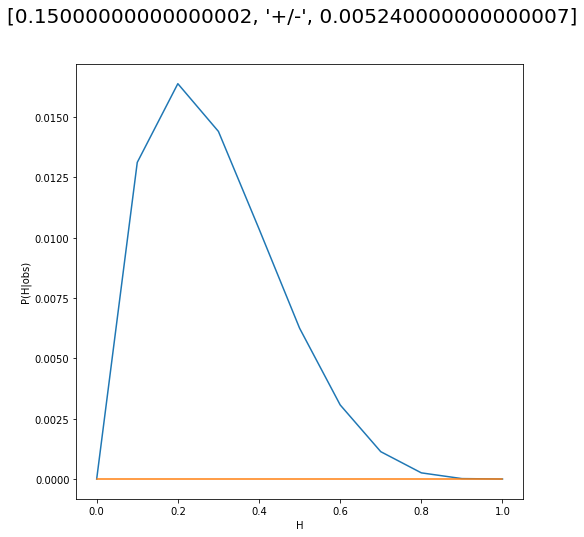

In [107]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.plot(H,gaussian(H,x_bar,sig))
plt.xlabel("H")
plt.ylabel('P(H|obs)')
plt.suptitle(valor, fontsize=20)

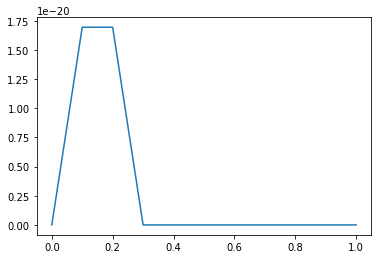

In [108]:
plt.plot(H,gaussian(H,x_bar,sig))